# HOMEWORK 13

In this homework you are going to build your first classifier for the CIFAR-10 dataset. This dataset contains 10 different classes and you can learn more about it [here](https://www.cs.toronto.edu/~kriz/cifar.html). This homework consists of the following tasks:
* Dataset inspection
* Building the network
* Training
* Evaluation

At the end, as usual, there will be a couple of questions for you to answer :-)

In [43]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, Dense, Flatten, Input, MaxPooling2D
from tensorflow.keras import Model
from time import time
from collections import Counter

from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]

# Set the seeds for reproducibility
from numpy.random import seed
from tensorflow.random import set_seed
seed_value = 1234578790
seed(seed_value)
set_seed(seed_value)

### Step 0: Dataset Inspection

Load the dataset and make a quick inspection.

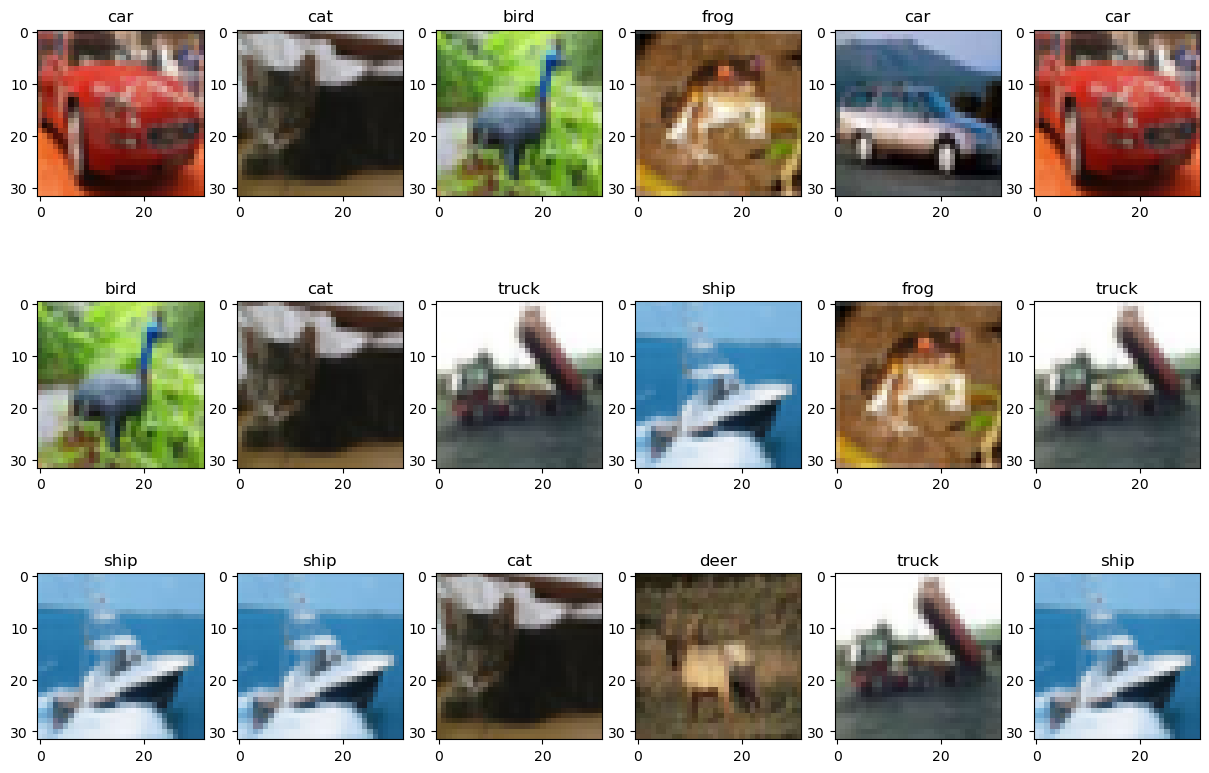

In [44]:
# Load the dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
# Mapping from class ID to class name
classes = {0:'plane', 1:'car', 2:'bird', 3:'cat', 4:'deer',
           5:'dog', 6:'frog', 7:'horse', 8:'ship', 9:'truck'}
# Dataset params
num_classes = len(classes)
size = x_train.shape[1]
# Visualize random samples (as a plot with 3x6 samples)
for ii in range(18):    
    plt.subplot(3,6,ii+1)
    # Pick a random sample
    idx = np.random.randint(0, len(classes))
    # Show the image and the label
    plt.imshow(x_train[idx, ...])
    plt.title(classes[int(y_train[idx])])

Compute the class histogram (you can visualize it if you want). Is the dataset balanced?

Hint: You might find [Counter](https://docs.python.org/3/library/collections.html#collections.Counter) tool useful. In any case, it's up to you how you compute the histogram.

(Text(0.5, 0, 'Class ID'), Text(0, 0.5, 'Counts'))

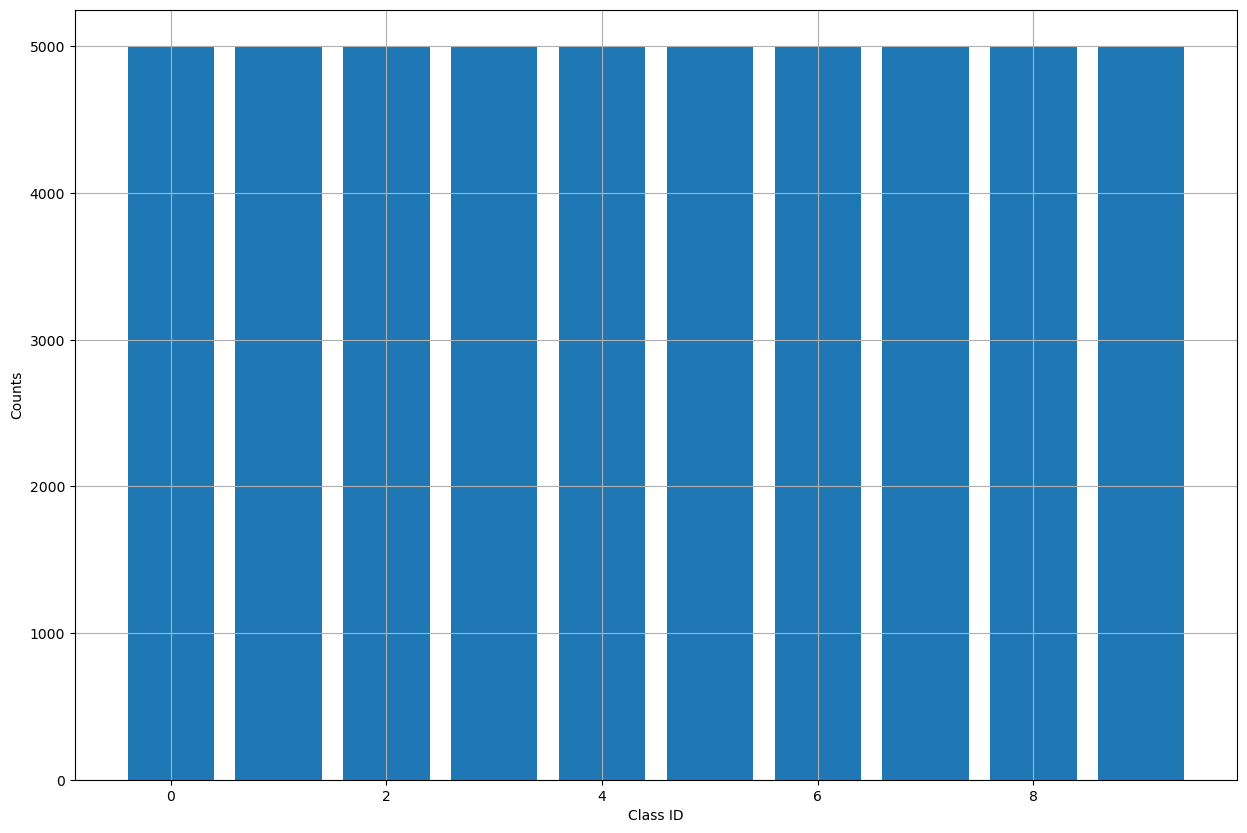

In [45]:
# Compute the class histogram 
hist = Counter(y_train.flatten())

plt.bar(hist.keys(), hist.values()), plt.grid(True)
plt.xlabel('Class ID'), plt.ylabel('Counts')

### Step 1: Data Preparation

In this step, you'll need to prepare the data for training, i.e., you will have to normalize it and encode the labels as one-hot vectors.

In [46]:
# Normalization
x_train = x_train/255
x_test = x_test/255

# One-hot encoding
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

print('Train set:   ', len(y_train), 'samples')
print('Test set:    ', len(y_test), 'samples')
print('Sample dims: ', x_train.shape)

Train set:    50000 samples
Test set:     10000 samples
Sample dims:  (50000, 32, 32, 3)


### Step 2: Building the Classifier

Build the CNN for CIFAR10 classification. For starters, you can use the same network we used in the lesson for the MNIST problem.

In [47]:
# Build the classifier
inputs = Input(shape=(size, size, 3))

net = Conv2D(8, kernel_size=(3, 3), activation="relu", padding='same')(inputs)
net = MaxPooling2D(pool_size=(2, 2))(net)
net = Conv2D(16, kernel_size=(3, 3), activation="relu", padding='same')(net)
net = MaxPooling2D(pool_size=(2, 2))(net)
net = Conv2D(32, kernel_size=(3, 3), activation="relu", padding='same')(net)
net = MaxPooling2D(pool_size=(2, 2))(net)
net = Flatten()(net)
outputs = Dense(num_classes, activation="softmax")(net)

model = Model(inputs, outputs)
model.summary()


Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 32, 32, 8)         224       
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 16, 16, 8)         0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 16, 16, 16)        1168      
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 8, 8, 16)          0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 8, 8, 32)          4640      
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 4, 4, 32)          0   

### Step 3: Training

Compile the model and train it.

In [48]:
epochs = 30
batch_size = 128
# Compile the model
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
# Train the model
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1, shuffle=False)

Epoch 1/30
352/352 [==============================] - 40s 112ms/step - loss: 1.9874 - accuracy: 0.2744 - val_loss: 1.5696 - val_accuracy: 0.4314
Epoch 2/30
352/352 [==============================] - 41s 116ms/step - loss: 1.5054 - accuracy: 0.4609 - val_loss: 1.4252 - val_accuracy: 0.4924
Epoch 3/30
352/352 [==============================] - 37s 105ms/step - loss: 1.3947 - accuracy: 0.5073 - val_loss: 1.3485 - val_accuracy: 0.5212
Epoch 4/30
352/352 [==============================] - 35s 100ms/step - loss: 1.3179 - accuracy: 0.5359 - val_loss: 1.2912 - val_accuracy: 0.5424
Epoch 5/30
352/352 [==============================] - 41s 117ms/step - loss: 1.2558 - accuracy: 0.5597 - val_loss: 1.2462 - val_accuracy: 0.5608
Epoch 6/30
352/352 [==============================] - 42s 118ms/step - loss: 1.2067 - accuracy: 0.5748 - val_loss: 1.2075 - val_accuracy: 0.5750
Epoch 7/30
352/352 [==============================] - 40s 113ms/step - loss: 1.1658 - accuracy: 0.5915 - val_loss: 1.1763 - val_ac

Train Acc      0.7039333581924438
Validation Acc 0.6833999752998352


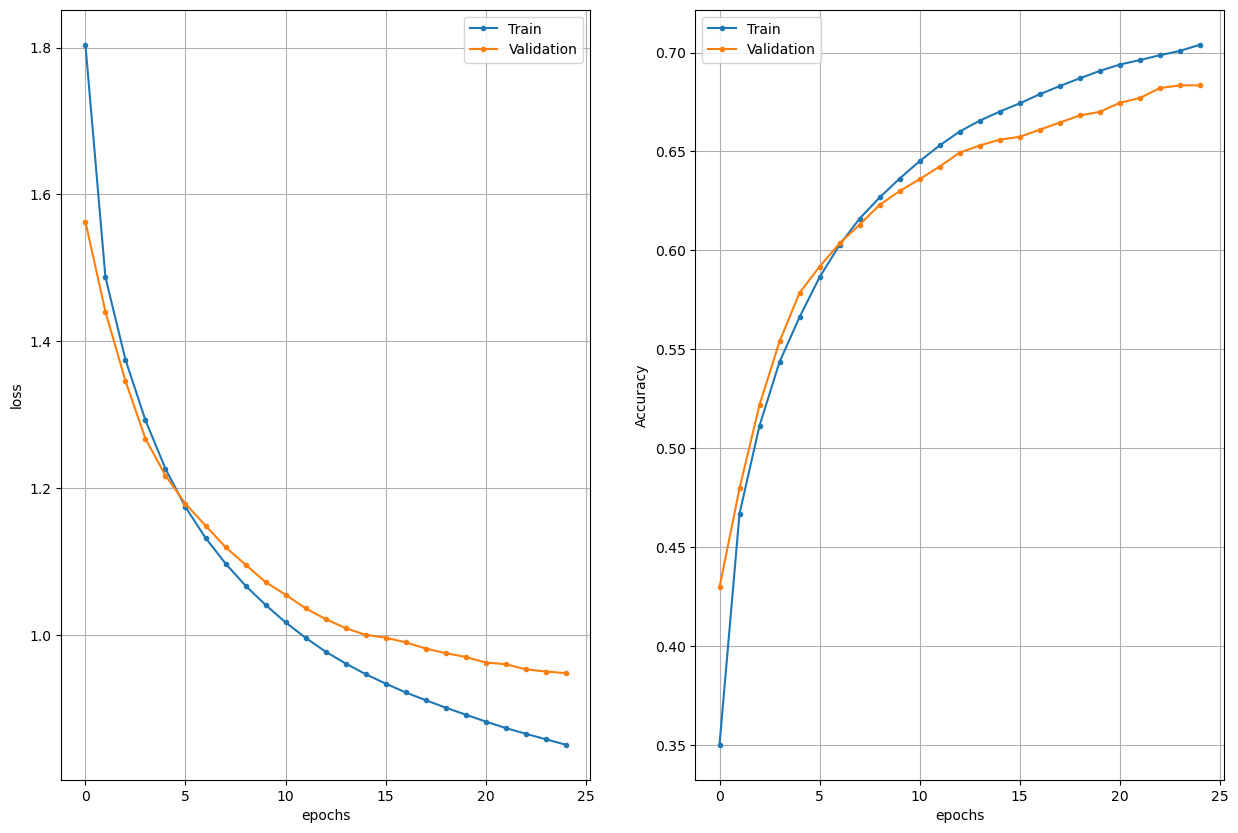

In [36]:
# Show training history (this cell is complete, nothing to implement here :-) )
h = history.history
epochs = range(len(h['loss']))

plt.subplot(121), plt.plot(epochs, h['loss'], '.-', epochs, h['val_loss'], '.-')
plt.grid(True), plt.xlabel('epochs'), plt.ylabel('loss')
plt.legend(['Train', 'Validation'])
plt.subplot(122), plt.plot(epochs, h['accuracy'], '.-',
                           epochs, h['val_accuracy'], '.-')
plt.grid(True), plt.xlabel('epochs'), plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'])

print('Train Acc     ', h['accuracy'][-1])
print('Validation Acc', h['val_accuracy'][-1])    

### Step 4: Evaluation

In this step, you have to calculate the accuracies and visualize some random samples. For the evaluation, you are going to use the test split from the dataset.

In [37]:
# Compute the labels and the predictions as sparse values
y_true = np.argmax(y_test, axis=1)
y_pred = model.predict(x_test)

print('True', y_true[0:5])
print('Pred', np.argmax(y_pred[0:5, :], axis=1))
print('Pred', y_pred[0:5, :])
print(y_pred.shape)


True [3 8 8 0 6]
Pred [3 8 8 0 6]
Pred [[3.9240094e-03 4.9619877e-04 2.8681683e-03 7.2640580e-01 7.6113961e-04
  2.0221464e-01 4.7111288e-02 1.9154376e-03 1.3817660e-02 4.8569831e-04]
 [3.0563060e-02 3.5086709e-01 8.8040346e-05 7.7704626e-06 5.0694989e-06
  2.2153054e-07 6.0840025e-06 1.3088163e-07 6.1354321e-01 4.9194209e-03]
 [1.6081406e-01 6.8879485e-02 7.3493565e-03 3.1909175e-02 9.0484563e-03
  2.0487823e-03 2.6194716e-04 2.3323044e-02 6.9424915e-01 2.1166475e-03]
 [7.4851936e-01 3.0726133e-02 1.4097943e-02 2.2673742e-03 2.4993951e-03
  5.7712594e-05 9.2451570e-05 6.6653462e-05 2.0162183e-01 5.1034545e-05]
 [5.2895331e-05 5.2819618e-05 9.6264137e-03 2.0379692e-02 8.1047580e-02
  3.3530628e-04 8.8784480e-01 5.7009755e-05 5.4827472e-04 5.5271506e-05]]
(10000, 10)


In [38]:
tp = dict.fromkeys(classes.keys(), 0)
total = dict.fromkeys(classes.keys(), 0)

for idx,class_id in enumerate(np.argmax(y_pred, axis=1)): 
    tp[class_id] = tp[class_id] + (class_id == y_true[idx])
    total[y_true[idx]] += 1
    
for class_id, class_name in classes.items():
    acc = tp[class_id]/total[class_id]
    print(class_name, acc)

plane 0.776
car 0.811
bird 0.564
cat 0.471
deer 0.614
dog 0.537
frog 0.818
horse 0.708
ship 0.672
truck 0.709


In [39]:
# Print the overall stats
ev = model.evaluate(x_test, y_test)
print('Test loss  ', ev[0])
print('Test metric', ev[1])

313/313 [==============================] - 2s 6ms/step - loss: 0.9759 - accuracy: 0.6680
Test loss   0.9758589863777161
Test metric 0.6679999828338623


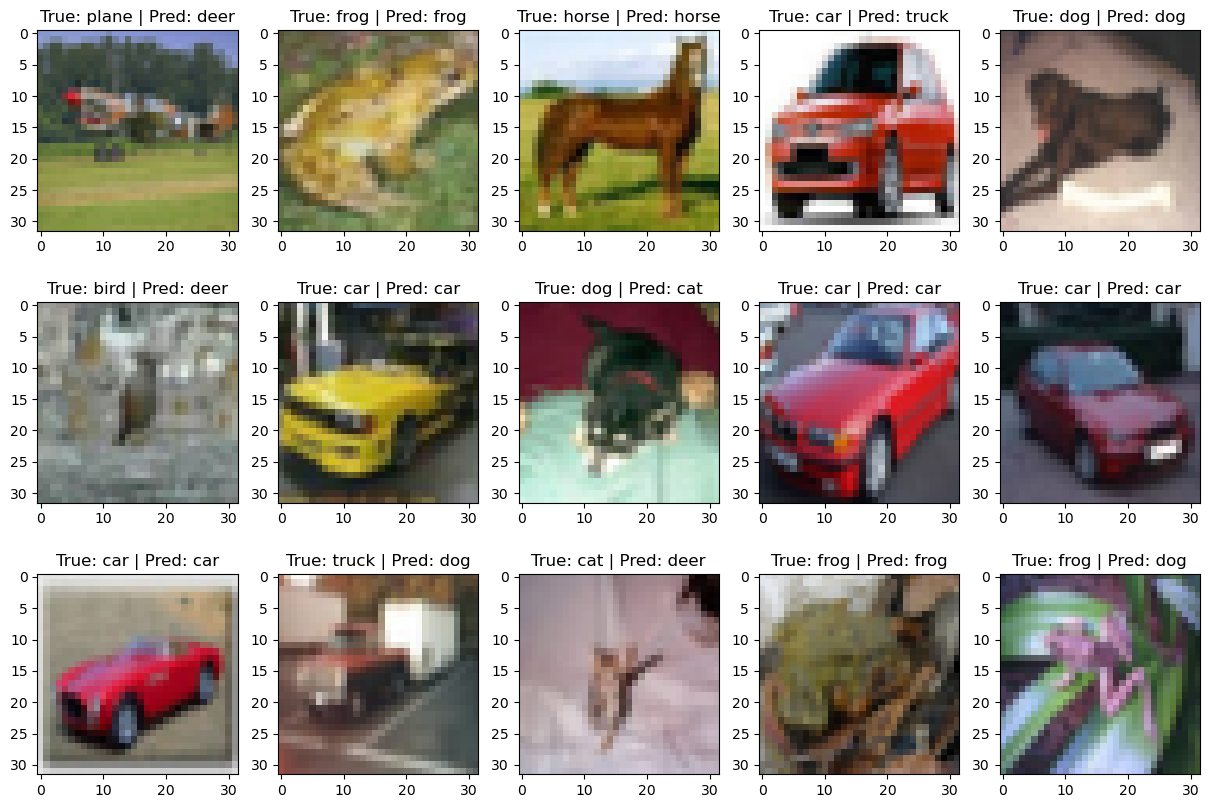

In [162]:
# Show random samples
y_pred = np.argmax(y_pred, axis=1)
for ii in range(15):
    # Pick a random sample
    idx = np.random.randint(0, len(y_pred))
    # Show the results
    plt.subplot(3,5,ii+1), plt.imshow(x_test[idx, ...])
    plt.title('True: ' + str(classes[y_true[idx]]) + ' | Pred: ' + str(classes[y_pred[idx]]))
    

### Questions
* What is the overall accuracy of the classifier?
        был 0.65, я добился 0.69
* What modifications would you do in order to improve the classification accuracy?
        добавил бы нормализацию, может еще какие слои.
* Make **one** modification (that you think can help) and train the classifier again. Does the accuracy improve?
        пробывал добавлять epochs, добалял слои, максимум чего мне удалось добиться accuracy с 0.65 до 0.69